In [37]:
f = open("images/sino1.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [38]:
line[3:20]

'0.0000000e+00\t   '

In [39]:
import numpy as np
tooth3_3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        tooth3_3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

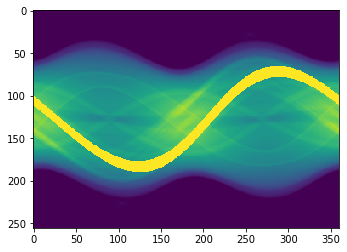

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(tooth3_3_img)
plt.colorbar

In [41]:
tooth3_3_img.shape

(256, 360)

In [42]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import requests
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
model = Sequential() # Sequeatial Model 
model.add(LSTM(640, input_shape=(1, 3))) # (timestep, feature) 
model.add(Dense(300)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 640)               1648640   
_________________________________________________________________
dense_7 (Dense)              (None, 300)               192300    
Total params: 1,840,940
Trainable params: 1,840,940
Non-trainable params: 0
_________________________________________________________________


In [43]:
result_img = tooth3_3_img
window_size = 3
x_data = []
y_data = []
k = 0
for j in range(30):
    for i in range(256-window_size-1):
        if 0 in result_img[i:i+1+window_size,j]:
            z=0
        else:
            if result_img[i+1+window_size, j] == 300:
                if k == 0:
                    x_train_data = np.asarray(x_data)
                    y_train_data = np.asarray(y_data)
                    model.fit(x_train_data, y_train_data, epochs = 300, batch_size = 1)
                    k = k + 1
                    x_test_data = []
                    x_test_data.append([result_img[i:i+window_size,j]])
                    x_predict_data = np.asarray(x_test_data)
                    prediction = model.predict(x_predict_data)
                    result_img[i:i+1+window_size,j] = prediction[0,0]
                x_test_data = []
                x_test_data.append([result_img[i:i+window_size,j]])
                x_predict_data = np.asarray(x_test_data)
                prediction = model.predict(x_predict_data)
                result_img[i+1+window_size,j] = prediction[0,0]
            else:
                x_data.append([result_img[i:i+window_size,j]])
                y_data.append(result_img[i+1+window_size,j])

Epoch 1/300
70/70 [==============================] - 0s 7ms/step - loss: 12903.8223
Epoch 2/300
70/70 [==============================] - 0s 7ms/step - loss: 8927.1982
Epoch 3/300
70/70 [==============================] - 0s 7ms/step - loss: 6226.1733
Epoch 4/300
70/70 [==============================] - 0s 7ms/step - loss: 4415.7383
Epoch 5/300
70/70 [==============================] - 0s 7ms/step - loss: 3191.0835
Epoch 6/300
70/70 [==============================] - 1s 7ms/step - loss: 2324.3796
Epoch 7/300
70/70 [==============================] - 0s 7ms/step - loss: 1700.2227
Epoch 8/300
70/70 [==============================] - 1s 7ms/step - loss: 1258.9984
Epoch 9/300
70/70 [==============================] - 0s 7ms/step - loss: 1013.7627
Epoch 10/300
70/70 [==============================] - 1s 7ms/step - loss: 945.2797
Epoch 11/300
70/70 [==============================] - 0s 7ms/step - loss: 674.9463
Epoch 12/300
70/70 [==============================] - 0s 7ms/step - loss: 548.8111
Epo

70/70 [==============================] - 1s 8ms/step - loss: 152.7344
Epoch 100/300
70/70 [==============================] - 0s 7ms/step - loss: 141.0544
Epoch 101/300
70/70 [==============================] - 0s 7ms/step - loss: 114.9358
Epoch 102/300
70/70 [==============================] - 1s 7ms/step - loss: 152.7605
Epoch 103/300
70/70 [==============================] - 1s 8ms/step - loss: 154.0312
Epoch 104/300
70/70 [==============================] - 1s 7ms/step - loss: 115.1359
Epoch 105/300
70/70 [==============================] - 1s 7ms/step - loss: 105.5010
Epoch 106/300
70/70 [==============================] - 1s 7ms/step - loss: 189.8539
Epoch 107/300
70/70 [==============================] - 0s 7ms/step - loss: 150.3868
Epoch 108/300
70/70 [==============================] - 0s 7ms/step - loss: 189.2567
Epoch 109/300
70/70 [==============================] - 0s 7ms/step - loss: 119.8099
Epoch 110/300
70/70 [==============================] - 0s 7ms/step - loss: 145.3112
Epoch 

70/70 [==============================] - 0s 7ms/step - loss: 93.5567
Epoch 197/300
70/70 [==============================] - 1s 7ms/step - loss: 152.1959
Epoch 198/300
70/70 [==============================] - 1s 8ms/step - loss: 148.0817
Epoch 199/300
70/70 [==============================] - 0s 7ms/step - loss: 81.3212
Epoch 200/300
70/70 [==============================] - 0s 7ms/step - loss: 102.0062
Epoch 201/300
70/70 [==============================] - 0s 7ms/step - loss: 134.8023
Epoch 202/300
70/70 [==============================] - 0s 7ms/step - loss: 158.1368
Epoch 203/300
70/70 [==============================] - 0s 7ms/step - loss: 97.2017
Epoch 204/300
70/70 [==============================] - 0s 7ms/step - loss: 126.5806
Epoch 205/300
70/70 [==============================] - 0s 6ms/step - loss: 87.0601
Epoch 206/300
70/70 [==============================] - 0s 7ms/step - loss: 131.4159
Epoch 207/300
70/70 [==============================] - 0s 7ms/step - loss: 98.8889
Epoch 208/3

70/70 [==============================] - 1s 7ms/step - loss: 67.7079
Epoch 295/300
70/70 [==============================] - 1s 7ms/step - loss: 113.4910
Epoch 296/300
70/70 [==============================] - 0s 7ms/step - loss: 78.0985
Epoch 297/300
70/70 [==============================] - 0s 7ms/step - loss: 77.1226
Epoch 298/300
70/70 [==============================] - 0s 7ms/step - loss: 94.8389
Epoch 299/300
70/70 [==============================] - 1s 7ms/step - loss: 68.7123
Epoch 300/300
70/70 [==============================] - 0s 7ms/step - loss: 69.3098


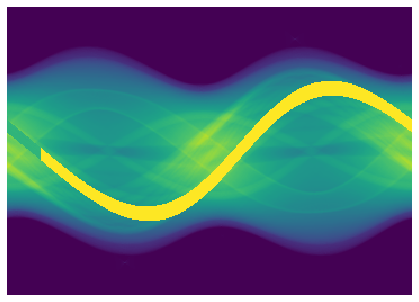

In [44]:
plt.imshow(result_img[:,:])
plt.colorbar
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/RNN1.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [ ]:
# np.savetxt('images/tooth3_training_txt.txt', result_img)